In [1]:
import numpy as np
import pandas as pd
from bs4 import BeautifulSoup
import requests
import re
from collections import defaultdict
import time

In [19]:
year2urls = defaultdict(list)

In [9]:
with open('URLs.txt', 'r') as f:
    test = f.readline()

In [20]:
with open('URLs.txt', 'r') as f:
    for t in f.readlines():
        if 'http' not in t:
            year = t[t.find('2'):t.find('2') + 4]
        else:
            year2urls[year].append(t.strip())


In [ ]:
resultsdic = 

In [ ]:
def 

In [43]:
def get_metadata(url):
    r = requests.get(url)   
    urlText = r.text
    soup = BeautifulSoup(urlText)
    title = get_title(soup)
    date = get_date(soup)
    fors, againsts = get_debators(soup)
    return [title, date, fors, againsts]

In [63]:
len(metadata_all)

100

In [64]:
metadata_all = []
count = 0
for year in range(2019, 2005, -1):
    print(year)
    for url in year2urls[str(year)]:
        metadata_all.append(get_metadata(url))

2019
2018
2017
2016
2015
2014
2013
2012
2011
2010
2009
2008
2007
2006


In [69]:
df = pd.DataFrame(metadata_all, columns = ['title', 'date', 'for', 'against'])
df.head()#.to_csv('metadata.csv', index = False)

,title,date,for,against
0,Capitalism Is a Blessing,"November 12, 2019","[John Mackey, Katherine Mangu-Ward]","[Bhaskar Sunkara, Richard D. Wolff]"
1,Parenting Is Overrated,"October 29, 2019","[Robert Plomin, Nancy Segal]","[Paige Harden, Ann Pleshette Murphy]"
2,Europe Has Declared War on American Tech Compa...,"October 22, 2019","[Roslyn Layton, Berin Szóka]","[Marietje Schaake, Ramesh Srinivasan]"
3,Replace Private Insurance with Medicare for All,"September 17, 2019","[Dr. Adam Gaffney, Joseph Sanberg]","[Nick Gillespie, Sally Pipes]"
4,Unresolved: Shifting Power in the Middle East,"September 12, 2019","[Michael Doran, Reuel Marc Gerecht, Bernard Ha...","[Brett McGurk, Barbara Slavin]"


In [71]:
from datetime import datetime
datetime.strptime('November 12, 2019', "%B %d, %Y").strftime('%m%d%Y')

'11122019'

In [73]:
df['date'] = df['date'].apply(lambda x: datetime.strptime(x, "%B %d, %Y"))

In [80]:
df['id'] = df['date'].apply(lambda x: 'd' + datetime.strftime(x, "%Y%m%d"))

In [81]:
df.loc[df['title'] == 'Edit']

,title,date,for,against,id
10,Edit,2019-03-04,"[David French, Corynne McSherry]","[Nathaniel Persily, Marietje Schaake]",d20190304
12,Edit,2019-02-11,[IBM Project Debater],[Harish Natarajan],d20190211
72,Edit,2015-03-31,"[Gene Healy, Deborah Pearlstein]","[Akhil Reed Amar, Philip Bobbitt]",d20150331
110,Edit,2012-10-10,"[Dr. Art Kellermann, Peter Singer]","[Ken Connor, Sally Pipes]",d20121010
155,Edit,2008-09-16,"[Dr. Art Kellermann, Paul Krugman, Michael Rac...","[Michael F. Cannon, Sally Pipes, John Stossel]",d20080916
173,Edit,2006-10-17,"[Philip Gourevitch, Christopher Hitchens, Sign...","[David Cesarani, Daisy Khan, Mari Matsuda]",d20061017


In [82]:
#df.to_csv('metadata.csv', index = False)

In [83]:
df2 = pd.read_csv('metadata.csv')
df2

,title,date,for,against,id
0,Capitalism Is a Blessing,2019-11-12,"['John Mackey', 'Katherine Mangu-Ward']","['Bhaskar Sunkara', 'Richard D. Wolff']",d20191112
1,Parenting Is Overrated,2019-10-29,"['Robert Plomin', 'Nancy Segal']","['Paige Harden', 'Ann Pleshette Murphy']",d20191029
2,Europe Has Declared War on American Tech Compa...,2019-10-22,"['Roslyn Layton', 'Berin Szóka']","['Marietje Schaake', 'Ramesh Srinivasan']",d20191022
3,Replace Private Insurance with Medicare for All,2019-09-17,"['Dr. Adam Gaffney', 'Joseph Sanberg']","['Nick Gillespie', 'Sally Pipes']",d20190917
4,Unresolved: Shifting Power in the Middle East,2019-09-12,"['Michael Doran', 'Reuel Marc Gerecht', 'Berna...","['Brett McGurk', 'Barbara Slavin']",d20190912
5,The Recent U.S. Policy Towards China Is Produc...,2019-08-02,"['Michael Pillsbury', 'Kori Schake']","['Graham Allison', 'Jake Sullivan']",d20190802
6,The Transatlantic Relationship Has Been Irrepa...,2019-06-28,"['Federiga Bindi', 'Constanze Stelzenmüller']","['John J. Mearsheimer', 'Carla Norrlof']",d20190628
7,Engineering Solar Radiation Is a Crazy Idea,2019-04-18,"['Clive Hamilton', 'Anjali Viswamohanan']","['David Keith', 'Ted Parson']",d20190418
8,All Hail the Driverless Car!,2019-04-13,"['Amitai Bin-Nun', 'Chris Urmson']","['Meredith Broussard', 'Ashley Nunes']",d20190413
9,The Republican Party Should Not Re-Nominate Trump,2019-03-28,"['Jeff Flake', 'Bret Stephens']","['Kris Kobach', 'Liz Peek']",d20190328


In [92]:
transcripts = open("transcripts/transcripts.txt", 'w')
transcripts.write('adsasd asdfas da asd ')
transcripts.close()

In [85]:
date = get_date(soup)

In [89]:
datetime.strptime(date, "%B %d, %Y").strftime("%Y%m%d")

'20180502'

In [99]:
count = 0
for year in range(2019, 2005, -1):
    count += 1
    print(year)
    for url in year2urls[str(year)]:
        r = requests.get(url)   
        urlText = r.text
        soup = BeautifulSoup(urlText)
        try:
            transcripts = get_transcripts(soup)
        except:
            transcripts = ''
            print(url)
        date = get_date(soup)
        filename = 'transcripts/transcripts_d' + datetime.strptime(date, "%B %d, %Y").strftime("%Y%m%d")
        f = open(filename, 'w')
        f.write(transcripts)
        f.close()


2018
https://www.intelligencesquaredus.org/debates/swipe-left-dating-apps-have-killed-romance
2017
2016
https://www.intelligencesquaredus.org/debates/first-presidential-debate
2015
2014
2013
2012
2011
2010
2009
2008
2007
2006
https://www.intelligencesquaredus.org/debates/freedom-expression-must-include-license-offend


In [5]:
url = 'https://www.intelligencesquaredus.org/debates/lets-stop-welcoming-undocumented-immigrants'
r = requests.get(url)   
urlText = r.text
soup = BeautifulSoup(urlText)
transcripts = get_transcripts(soup)
filename = 'transcripts/transcripts_d2007100902'
f = open(filename, 'w')
f.write(transcripts)
f.close()        

In [100]:
url = 'https://www.intelligencesquaredus.org/debates/swipe-left-dating-apps-have-killed-romance'
r = requests.get(url)   
urlText = r.text
soup = BeautifulSoup(urlText)
get_date(soup)

<!DOCTYPE html>
<html lang="en">
<head>
<title>Swipe Left: Dating Apps Have Killed Romance | All Debates | Debate | IQ2US Debates</title>
<meta content="width=device-width, initial-scale=1.0, maximum-scale=1.0, user-scalable=0" name="viewport"/>
<meta content="index,follow" name="robots"/>
<script id="google-tag-manager-code">
    (function(w,d,s,l,i){w[l]=w[l]||[];w[l].push({'gtm.start':new Date().getTime(),event:'gtm.js'});var f=d.getElementsByTagName(s)[0],j=d.createElement(s),dl=l!='dataLayer'?'&l='+l:'';j.async=!0;j.src='https://www.googletagmanager.com/gtm.js?id='+i+dl;f.parentNode.insertBefore(j,f)})(window,document,'script','dataLayer','GTM-K3KC9SS')
  </script>
<script id="google-analytics-code">
    (function(i,s,o,g,r,a,m){i.GoogleAnalyticsObject=r;i[r]=i[r]||function(){(i[r].q=i[r].q||[]).push(arguments)},i[r].l=1*new Date();a=s.createElement(o),m=s.getElementsByTagName(o)[0];a.async=1;a.src=g;m.parentNode.insertBefore(a,m)})(window,document,'script','https://www.google-ana

In [125]:
transcripts = get_transcripts(soup)
date = get_date(soup)
filename = 'transcripts/transcripts_d' + datetime.strptime(date, "%B %d, %Y").strftime("%Y%m%d")
f = open(filename, 'w')
f.write(transcripts)
f.close()

In [4]:
def get_transcripts(soup):
    divs = soup.find('ul', attrs = {'id': 'transcript'})('div')
    transcripts = ''
    for div in divs:
        try:
            if div['class'][0] == 'text':
                transcripts += div.get_text().replace('\r\n', ' ').replace('\\', '')
            elif div['class'][0] == 'formated-time':
                transcripts += '[TS]' + div.get_text() + '[TE]'
            else:
                print(div['class'][0])
        except:
            continue
    return transcripts

In [24]:
def get_title(soup):
    return soup.find('title').get_text().split('|')[0].strip()

In [42]:
def get_date(soup):
    return soup.find('span', attrs = {'class': 'details-date'}).get_text()

In [58]:
def get_debators(soup):
    result = {}
    #debators = soup.find('div', attrs = {'class': "debaters"})
    deb_for = soup.find('div', attrs = {'class': "debaters-for-the-motion"})
    result['for'] = [div.get_text() for div in deb_for('div', attrs = {'class': "debater-item-name"})]
    deb_aga = soup.find('div', attrs = {'class': "debaters-against-the-motion"})
    result['against'] = [div.get_text() for div in deb_aga('div', attrs = {'class': "debater-item-name"})]
    return result['for'], result['against']

In [45]:
for e in trans.findAll('br'):
    e.replace_with('')

In [50]:
trans.get_text().replace('\r\n', '')

'John Donvan: So at this moment, I would like to bring that gentleman to the stage. And please welcome Mr. Robert Rosenkranz. [applause] John Donvan: Hey, Bob. Robert Rosenkranz: Hi, John. John Donvan: Good to see you. So, Bob, I know this already that you are a son of Yale yourself. Robert Rosenkranz: That\'s true. John Donvan: I noticed, walking around, that there was a building with the name "Rosenkranz" on it, which I\'m assuming is just a total coincidence. Intelligence Squared U.S. - 2 - 3/2/2016 Prepared by National Capitol Contracting 200 N. Glebe Rd., #1016 Arlington, VA 22203 Robert Rosenkranz: It is not a complete coincidence in all truth. But, yeah, I\'m very proud of that building. But I\'m also proud of another thing that has my name on it at Yale, which is something that my son and I did when we -- together in the connection of the renovation of Pearson College.'

In [98]:
from selenium import webdriver
import time

url = "https://www.reuters.com/search/news?blob=soybean&sortBy=date&dateRange=all"
driver = webdriver.PhantomJS(executable_path = "/Users/xuanyuwu/Files/phantomjs/bin/phantomjs")
driver.get(url)
html = driver.page_source.encode('utf-8')
page_num = 0

while driver.find_elements_by_css_selector('.search-result-more-txt'):
    driver.find_element_by_css_selector('.search-result-more-txt').click()
    page_num += 1
    print("getting page number "+str(page_num))
    time.sleep(1)

html = driver.page_source.encode('utf-8')

getting page number 1
getting page number 2
getting page number 3
getting page number 4
getting page number 5
getting page number 6
getting page number 7
getting page number 8
getting page number 9
getting page number 10
getting page number 11
getting page number 12
getting page number 13
getting page number 14
getting page number 15
getting page number 16
getting page number 17
getting page number 18
getting page number 19
getting page number 20
getting page number 21
getting page number 22
getting page number 23
getting page number 24
getting page number 25
getting page number 26
getting page number 27
getting page number 28
getting page number 29
getting page number 30
getting page number 31
getting page number 32
getting page number 33
getting page number 34
getting page number 35
getting page number 36
getting page number 37
getting page number 38
getting page number 39
getting page number 40


KeyboardInterrupt: 

In [99]:
soup = BeautifulSoup(html, 'lxml')


b'<!--[if !IE]> This has NOT been served from cache <![endif]--><!--[if !IE]> Request served from apache server: prodie--i-0b092e1e87360871f <![endif]--><!--[if !IE]> token: 5fb15da1-f5c3-44ee-925b-19c43138c69b <![endif]--><!--[if !IE]> App Server /prodie--i-0b092e1e87360871f/ <![endif]--><!DOCTYPE html><html lang="en" class=""><head>\n<title>Search Results</title>\n    <meta http-equiv="X-UA-Compatible" content="IE=edge"><meta charset="utf-8"><meta http-equiv="x-dns-prefetch-control" content="on"><link rel="dns-prefetch" href="//s1.reutersmedia.net"><link rel="dns-prefetch" href="//s2.reutersmedia.net"><link rel="dns-prefetch" href="//s3.reutersmedia.net"><link rel="dns-prefetch" href="//s4.reutersmedia.net"><link rel="dns-prefetch" href="//static.reuters.com"><link rel="dns-prefetch" href="//www.googletagservices.com"><link rel="dns-prefetch" href="//www.googletagmanager.com"><link rel="dns-prefetch" href="//www.google-analytics.com"><link rel="dns-prefetch" href="//static.chartbeat.
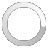

In [101]:
html

In [ ]:
links = soup.find_all('div', attrs={"class":'search-result-indiv'})
articles = [a.find('a')['href'] for a in links if a != '']